#### Importar librerias a utilizar

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

#Para mostrar todas las columnas en un describe
from IPython.display import display
pd.set_option('display.max_columns', None)

#### Cargar datos

In [2]:
#Normal condition
cnt9 = pd.read_csv("./PRONTO benchmark case study/C0 Normal and Slugging conditions/Test9/Process Data/0912Testday4.csv",
                  skiprows=[0,2])
cnt9["STATE"]=1
cnt9.shape

(14401, 33)

In [3]:
#Air blockage
abt2 = pd.read_csv(r".\PRONTO benchmark case study\C1 Air Blockage\Test2\Process Data/0907Testday2.csv", low_memory=False,
                  skiprows=[0,2])
abt2["STATE"]=2
abt2.shape

(18601, 33)

In [4]:
#Air Leakage

alt4 = pd.read_csv(r".\PRONTO benchmark case study\C2 Air Leakage\Test4\Process Data\0907Testday2.csv", low_memory=False,
                  skiprows=[0,2])
alt4["STATE"]=3
alt4.shape

(18601, 33)

In [5]:
#Diverted flow
dft7 = pd.read_csv(r".\PRONTO benchmark case study\C3 Diverted flow\Test7\Process Data\0911Testday3.csv", low_memory=False,
                  skiprows=[0,2])
dft7["STATE"]=4
dft7.shape

(25201, 33)

In [6]:
df = pd.concat([cnt9,abt2,alt4,dft7],ignore_index = True, axis = 0)
df.shape

(76804, 33)

In [7]:
df.head()

,Unnamed: 0,FT305/OUT.CV,FT302/OUT.CV,FT305/AI2/OUT.CV,PT312/OUT.CV,FT102/OUT.CV,FT104/OUT.CV,FT102/AI3/OUT.CV,FT102/AI2/OUT.CV,PT417/OUT.CV,PT408/OUT.CV,PT403/OUT.CV,FT404/OUT.CV,FT406/OUT.CV,PT501/OUT.CV,PIC501/PID1/OUT.CV,LI502/OUT.CV,LI503/OUT.CV,LVC502-SR/PID1/OUT.CV,LI101/OUT.CV,FIC302/PID1/OUT.CV,FIC302/PID1/SP.CV,FIC302/PID1/PV.CV,FIC301/PID1/OUT.CV,FIC301/PID1/SP.CV,FIC301/PID1/PV.CV,FIC102/PID1/OUT.CV,FIC102/PID1/SP.CV,FIC102/PID1/PV.CV,FIC101/PID1/OUT.CV,FIC101/PID1/SP.CV,FIC101/PID1/PV.CV,STATE
0,09/12/2017 10:00,99.791138,0.002018,16.464531,1.157051,0.000150,0.008799,18.75639,998.257629,1.131950,0.99217,1.022368,0.000096,0.0,0.998363,23.334480,53.598412,98.679131,0.0,1.448831,58.708260,100.0,99.691002,0.0,100.001,0.002018,0.0,0.0,0.000150,0.0,0.0,0.008799,1
1,09/12/2017 10:00,99.843597,0.001718,16.465521,1.157019,0.000151,0.008799,18.75639,998.257812,1.131800,0.99217,1.022355,0.000095,0.0,0.998061,23.332979,53.597000,98.673973,0.0,1.448832,58.714481,100.0,99.745041,0.0,100.001,0.001718,0.0,0.0,0.000151,0.0,0.0,0.008799,1
2,09/12/2017 10:00,99.848373,0.001418,16.466499,1.156986,0.000152,0.008799,18.51083,998.257996,1.131650,0.99217,1.022342,0.000094,0.0,0.997758,23.331480,53.595600,98.668800,0.0,1.448833,58.720692,100.0,99.799088,0.0,100.001,0.001418,0.0,0.0,0.000152,0.0,0.0,0.008799,1
3,09/12/2017 10:00,99.824516,0.001118,16.467489,1.156954,0.000153,0.008799,18.51083,998.258179,1.131646,0.99217,1.022330,0.000094,0.0,0.997456,23.329981,53.594200,98.663643,0.0,1.448834,58.726898,100.0,99.853127,0.0,100.001,0.001118,0.0,0.0,0.000153,0.0,0.0,0.008799,1
4,09/12/2017 10:00,99.772057,4.008060,16.468470,1.156922,0.000154,0.008800,18.51083,998.258301,1.131642,0.99217,1.022317,0.000093,0.0,0.997601,23.328489,53.592800,98.658470,0.0,1.448835,58.733120,100.0,99.797951,0.0,100.001,4.008060,0.0,0.0,0.000154,0.0,0.0,0.008800,1


In [8]:
print(df.shape)

(76804, 33)


In [9]:
df["STATE"].value_counts()

4    25201
2    18601
3    18601
1    14401
Name: STATE, dtype: int64

#### Limpieza y seleccion de datos

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76804 entries, 0 to 76803
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             76804 non-null  object 
 1   FT305/OUT.CV           76804 non-null  float64
 2   FT302/OUT.CV           76804 non-null  float64
 3   FT305/AI2/OUT.CV       76804 non-null  float64
 4   PT312/OUT.CV           76804 non-null  float64
 5   FT102/OUT.CV           76804 non-null  float64
 6   FT104/OUT.CV           76804 non-null  float64
 7   FT102/AI3/OUT.CV       76804 non-null  float64
 8   FT102/AI2/OUT.CV       76804 non-null  float64
 9   PT417/OUT.CV           76804 non-null  float64
 10  PT408/OUT.CV           76804 non-null  float64
 11  PT403/OUT.CV           76804 non-null  float64
 12  FT404/OUT.CV           76804 non-null  float64
 13  FT406/OUT.CV           76804 non-null  float64
 14  PT501/OUT.CV           76804 non-null  float64
 15  PI

In [11]:
df.describe(include="all") #Describir tanto numéricas como categoricas

,Unnamed: 0,FT305/OUT.CV,FT302/OUT.CV,FT305/AI2/OUT.CV,PT312/OUT.CV,FT102/OUT.CV,FT104/OUT.CV,FT102/AI3/OUT.CV,FT102/AI2/OUT.CV,PT417/OUT.CV,PT408/OUT.CV,PT403/OUT.CV,FT404/OUT.CV,FT406/OUT.CV,PT501/OUT.CV,PIC501/PID1/OUT.CV,LI502/OUT.CV,LI503/OUT.CV,LVC502-SR/PID1/OUT.CV,LI101/OUT.CV,FIC302/PID1/OUT.CV,FIC302/PID1/SP.CV,FIC302/PID1/PV.CV,FIC301/PID1/OUT.CV,FIC301/PID1/SP.CV,FIC301/PID1/PV.CV,FIC102/PID1/OUT.CV,FIC102/PID1/SP.CV,FIC102/PID1/PV.CV,FIC101/PID1/OUT.CV,FIC101/PID1/SP.CV,FIC101/PID1/PV.CV,STATE
count,76804,76804.000000,7.680400e+04,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,7.680400e+04,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000
unique,3333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,09/07/2017 16:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.026812,2.728285e+01,17.605377,2.022598,0.290150,0.218574,23.631913,996.834289,1.765887,1.340203,0.994430,2.639869,0.557379,0.973049,21.463884,61.823688,98.483037,10.297004,1.429279,59.739442,98.282803,97.030053,0.371830,104.758286,2.728280e+01,5.684526,0.294740,0.290165,18.587388,0.226245,0.218597,2.710927
std,NaN,55.189259,4.566537e+01,1.344987,1.359803,0.699907,0.217908,1.869267,1.067207,1.049418,0.853358,0.138473,4.542834,0.547648,0.139053,7.854779,2.650904,0.780161,12.391724,0.013192,34.517338,55.618305,55.189191,2.074387,18.576785,4.566510e+01,11.545509,0.708399,0.699928,11.414476,0.216236,0.217927,1.112104
min,NaN,1.494432,8.940000e-20,15.107760,0.248900,-0.014126,-0.017031,18.197229,990.697327,0.270143,0.023938,0.046437,0.000000,-4.607517,0.020432,0.030689,49.399651,92.992767,0.000000,1.388638,0.000000,1.365684,1.365684,0.000000,100.001000,8.940000e-20,0.000000,0.000000,-0.014126,0.000000,0.000000,-0.017031,1.000000
25%,NaN,32.182951,1.300171e+00,16.145920,1.277146,-0.001038,0.005686,23.438101,996.325989,1.227321,1.012079,1.016031,0.000436,0.066063,0.995603,15.795205,61.746833,98.547127,1.970959,1.420929,19.566813,20.000000,32.168937,0.000000,100.001000,1.299858e+00,0.000000,0.000000,-0.001073,1.178286,0.100000,0.005686,2.000000
50%,NaN,119.289299,6.897190e+00,17.853130,1.544518,0.001009,0.099326,23.900450,996.862854,1.419119,1.040808,1.020075,0.046245,0.428365,0.999314,24.917020,61.980000,98.656143,6.937136,1.428023,70.955063,120.000000,119.303596,0.000000,100.001000,6.897190e+00,0.000000,0.001370,0.001009,21.641319,0.100000,0.099326,3.000000
75%,NaN,148.300507,2.839280e+01,18.640673,1.890439,0.005501,0.496994,24.757323,997.633118,1.698936,1.174086,1.024164,5.945019,1.025357,1.002637,27.231858,62.157545,98.698200,8.496162,1.441329,91.405426,150.000000,148.314804,0.000000,100.001000,2.841671e+01,0.000000,0.005482,0.005564,28.715322,0.500000,0.497054,4.000000


Eliminamos el campo __Unnamed: 0__ por que solo contiene datos de fecha y hora de la lectura de datos por lo que no es relevante para el modelo

In [12]:
df.drop("Unnamed: 0", inplace= True, axis = 1)

Buscamos valores nulos o iguales a cero para ver que campos pueden ser irrelevantes

<AxesSubplot:>

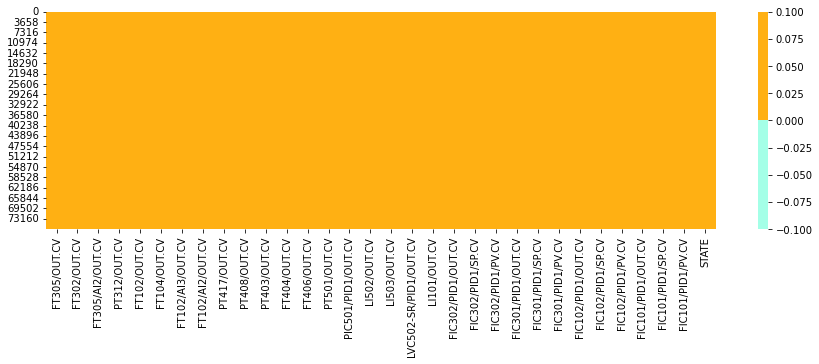

In [13]:
plt.figure(figsize=(15,4))
cols = df.columns[:]
colours = ['#A4FFE7', '#FFB013']
sns.heatmap(df[cols].isnull() , cmap=sns.color_palette(colours))

<AxesSubplot:>

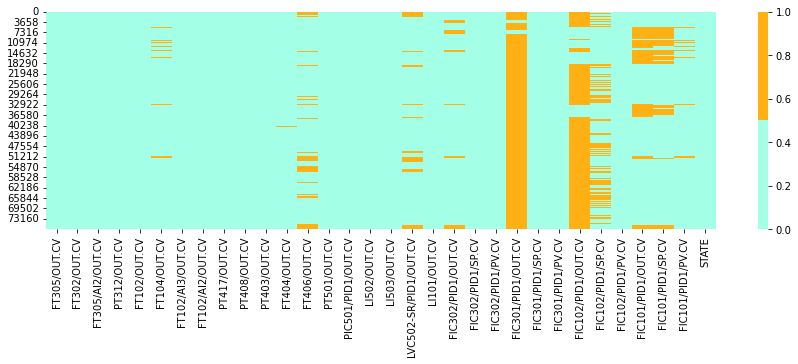

In [14]:
plt.figure(figsize=(15,4))
cols = df.columns[:]
colours = ['#A4FFE7', '#FFB013']
sns.heatmap(df[cols]==0 , cmap=sns.color_palette(colours))

In [15]:
#Calculamos el porcentaje de valores que tiene valor 0 en el campo FIC301/PID1/OUT.CV
print((df[df["FIC301/PID1/OUT.CV"]==0].shape[0]/df.shape[0])*100)
print((df[df["FIC102/PID1/OUT.CV"]==0].shape[0]/df.shape[0])*100)


96.8803708140201
80.06614238841728


Eliminamos los campos que contienen un alto porcentaje de valores nulos

In [16]:
df.drop(["FIC301/PID1/OUT.CV"],axis=1, inplace=True)
df.drop(["FIC102/PID1/OUT.CV"],axis=1, inplace=True)

<AxesSubplot:>

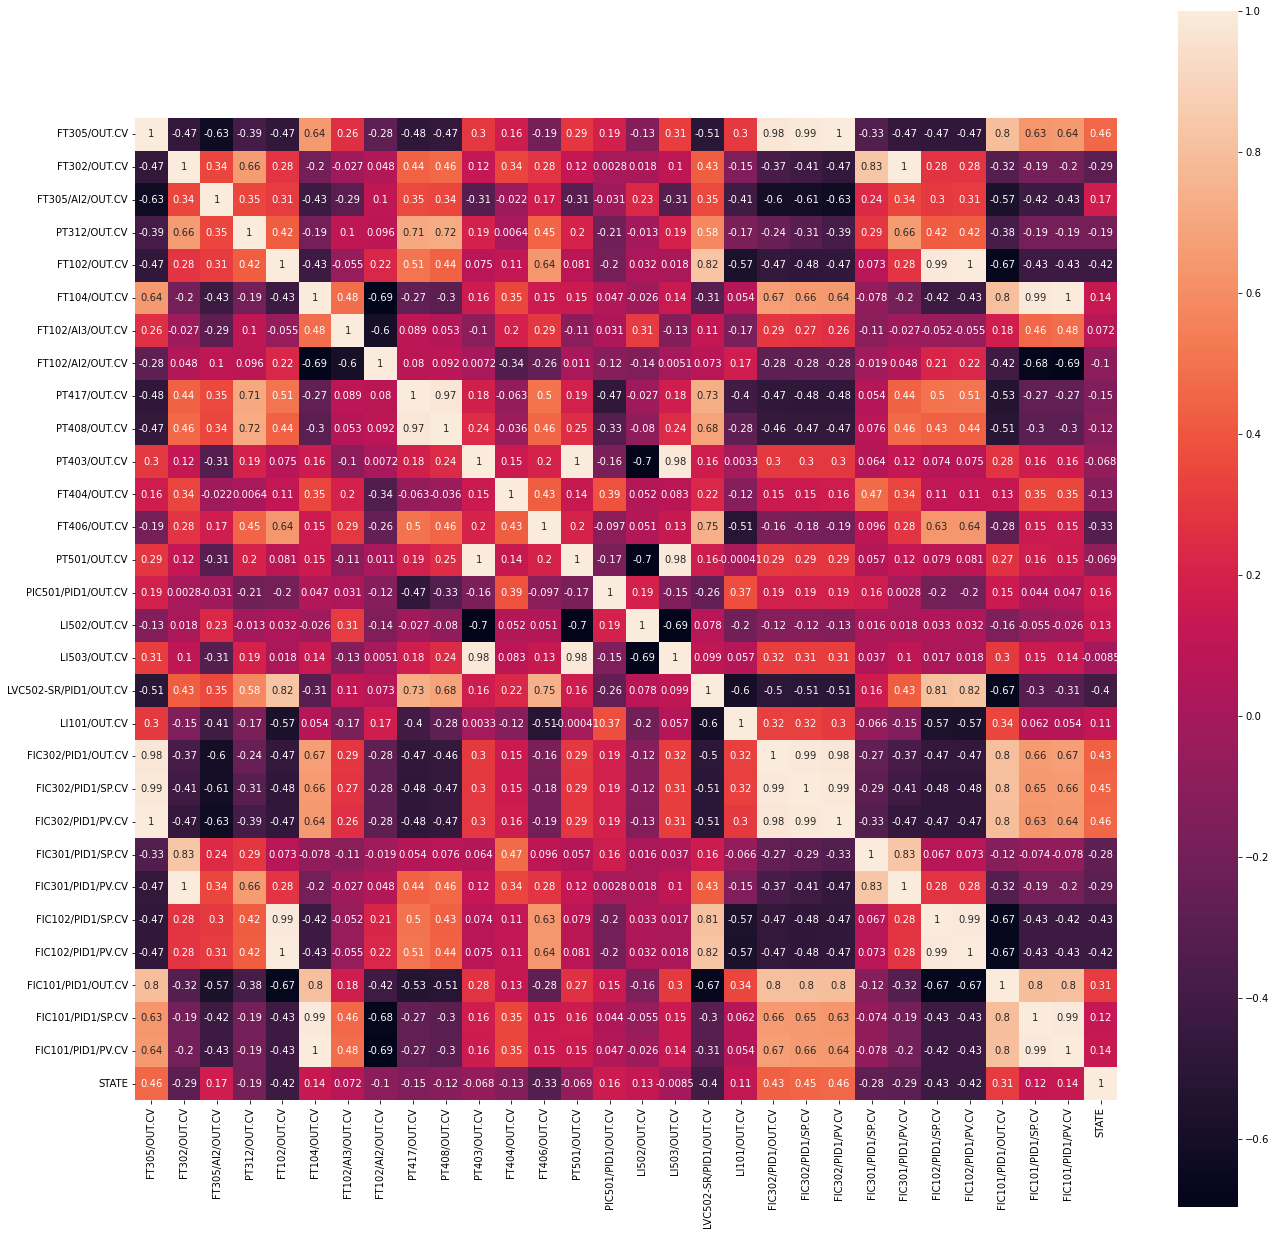

In [17]:
plt.figure(figsize=(22,22))
sns.heatmap(df.corr(), square=True, annot=True)

Se observa que existe una alta correlación con otras variables los campos correspondientes a: FT305/OUT.CV, FT302/OUT.CV, FT102/OUT.CV, FT104/OUT.CV, PT408/OUT.CV, PT403/OUT.CV, PT501/OUT.CV, FIC302/PID1/OUT.CV, FIC302/PID1/SP.CV, FIC102/PID1/PV.CV, FIC101/PID1/SP.CV

Eliminamos las columnas con alta correlación

In [18]:
df.drop(["FT305/OUT.CV", "FT302/OUT.CV", "FT102/OUT.CV", "FT104/OUT.CV", "PT408/OUT.CV", "PT403/OUT.CV", "PT501/OUT.CV",
         "FIC302/PID1/OUT.CV", "FIC302/PID1/SP.CV", "FIC102/PID1/PV.CV", "FIC101/PID1/SP.CV"], axis = 1, inplace=True)


In [19]:
df.shape

(76804, 19)

In [20]:
column_names = list(df.columns)
column_names

['FT305/AI2/OUT.CV',
 'PT312/OUT.CV',
 'FT102/AI3/OUT.CV',
 'FT102/AI2/OUT.CV',
 'PT417/OUT.CV',
 'FT404/OUT.CV',
 'FT406/OUT.CV',
 'PIC501/PID1/OUT.CV',
 'LI502/OUT.CV',
 'LI503/OUT.CV',
 'LVC502-SR/PID1/OUT.CV',
 'LI101/OUT.CV',
 'FIC302/PID1/PV.CV',
 'FIC301/PID1/SP.CV',
 'FIC301/PID1/PV.CV',
 'FIC102/PID1/SP.CV',
 'FIC101/PID1/OUT.CV',
 'FIC101/PID1/PV.CV',
 'STATE']

Verificamos que no queden varaibles altamente correlacionadas 

<AxesSubplot:>

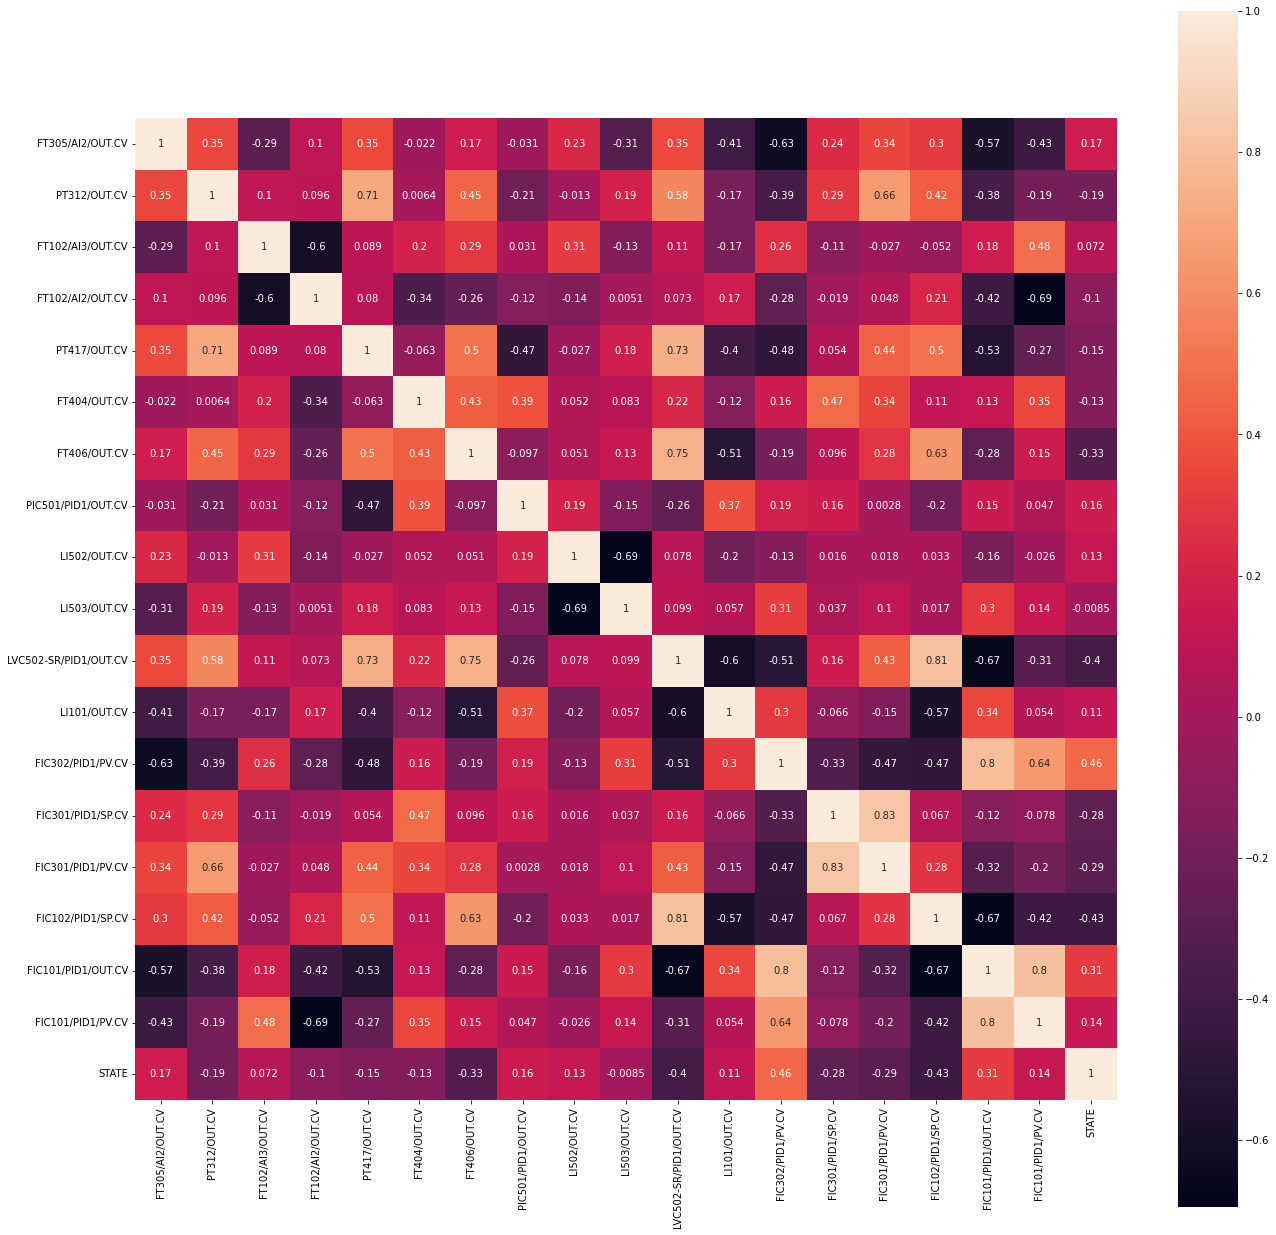

In [21]:
plt.figure(figsize=(22,22))
sns.heatmap(df.corr(), square=True, annot=True)

Mostrar las varaiables mas correlacionadas con la variable objetivo

<AxesSubplot:xlabel='STATE'>

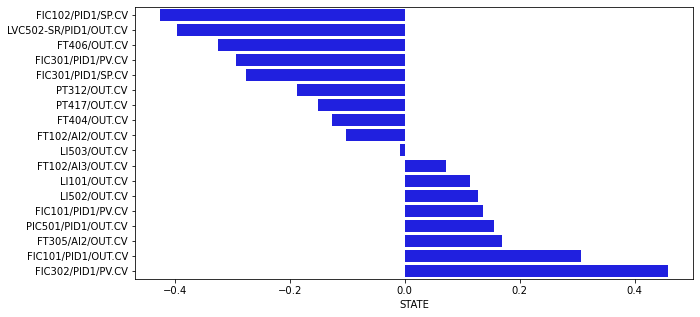

In [22]:
corr = df.corr()
total_corr = corr.sort_values(by='STATE', axis=0).drop('STATE')
plt.figure(figsize=(10, 5))
sns.barplot(x=total_corr.STATE, y=total_corr.index, color="b")

Realizamos una descripcion estadística de los datos

In [23]:
df.describe()

,FT305/AI2/OUT.CV,PT312/OUT.CV,FT102/AI3/OUT.CV,FT102/AI2/OUT.CV,PT417/OUT.CV,FT404/OUT.CV,FT406/OUT.CV,PIC501/PID1/OUT.CV,LI502/OUT.CV,LI503/OUT.CV,LVC502-SR/PID1/OUT.CV,LI101/OUT.CV,FIC302/PID1/PV.CV,FIC301/PID1/SP.CV,FIC301/PID1/PV.CV,FIC102/PID1/SP.CV,FIC101/PID1/OUT.CV,FIC101/PID1/PV.CV,STATE
count,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,76804.000000,7.680400e+04,76804.000000,76804.000000,76804.000000,76804.000000
mean,17.605377,2.022598,23.631913,996.834289,1.765887,2.639869,0.557379,21.463884,61.823688,98.483037,10.297004,1.429279,97.030053,104.758286,2.728280e+01,0.294740,18.587388,0.218597,2.710927
std,1.344987,1.359803,1.869267,1.067207,1.049418,4.542834,0.547648,7.854779,2.650904,0.780161,12.391724,0.013192,55.189191,18.576785,4.566510e+01,0.708399,11.414476,0.217927,1.112104
min,15.107760,0.248900,18.197229,990.697327,0.270143,0.000000,-4.607517,0.030689,49.399651,92.992767,0.000000,1.388638,1.365684,100.001000,8.940000e-20,0.000000,0.000000,-0.017031,1.000000
25%,16.145920,1.277146,23.438101,996.325989,1.227321,0.000436,0.066063,15.795205,61.746833,98.547127,1.970959,1.420929,32.168937,100.001000,1.299858e+00,0.000000,1.178286,0.005686,2.000000
50%,17.853130,1.544518,23.900450,996.862854,1.419119,0.046245,0.428365,24.917020,61.980000,98.656143,6.937136,1.428023,119.303596,100.001000,6.897190e+00,0.001370,21.641319,0.099326,3.000000
75%,18.640673,1.890439,24.757323,997.633118,1.698936,5.945019,1.025357,27.231858,62.157545,98.698200,8.496162,1.441329,148.314804,100.001000,2.841671e+01,0.005482,28.715322,0.497054,4.000000
max,20.912483,7.269874,26.674419,999.480774,5.497419,43.850960,2.840868,40.000000,77.190147,99.930847,56.039059,1.457208,209.851593,205.415100,2.080755e+02,3.500000,29.994650,0.528756,4.000000


In [24]:
df.iloc[:5,:].describe().to_clipboard(excel=True) # Sirve para copiar tablas al clipboard y pegarlas en excel

In [28]:
"""
min_max = MinMaxScaler().fit_transform(df)
min_max = pd.DataFrame(min_max)
df2 = min_max.set_axis(column_names, axis=1, inplace=False)
df2.to_csv("./Data1.csv")
"""

'\nmin_max = MinMaxScaler().fit_transform(df)\nmin_max = pd.DataFrame(min_max)\ndf2 = min_max.set_axis(column_names, axis=1, inplace=False)\ndf2.to_csv("./Data1.csv")\n'

In [31]:
df.iloc[5:10,:].var()

FT305/AI2/OUT.CV         2.426283e-06
PT312/OUT.CV             6.147624e-09
FT102/AI3/OUT.CV         4.249619e-02
FT102/AI2/OUT.CV         7.524963e-08
PT417/OUT.CV             3.422637e-11
FT404/OUT.CV             1.123000e-12
FT406/OUT.CV             0.000000e+00
PIC501/PID1/OUT.CV       5.625975e-06
LI502/OUT.CV             4.924028e-06
LI503/OUT.CV             6.679422e-05
LVC502-SR/PID1/OUT.CV    0.000000e+00
LI101/OUT.CV             1.699029e-12
FIC302/PID1/PV.CV        7.611338e-03
FIC301/PID1/SP.CV        0.000000e+00
FIC301/PID1/PV.CV        4.783347e-01
FIC102/PID1/SP.CV        0.000000e+00
FIC101/PID1/OUT.CV       0.000000e+00
FIC101/PID1/PV.CV        4.949170e-14
STATE                    0.000000e+00
dtype: float64

Creamos agrupaciones de 5 elementos mediante su promedio

In [25]:
N = 5
df = df.groupby(np.arange(len(df.index))//N, axis=0).mean()
#Eliminamos las agrupaciones que mezclaron clases
df = df[df["STATE"].isin([1,2,3,4])]

In [26]:
print(df.shape)
print(df["STATE"].value_counts())

(15358, 19)
4.0    5040
2.0    3719
3.0    3719
1.0    2880
Name: STATE, dtype: int64


In [27]:
df.describe()

,FT305/AI2/OUT.CV,PT312/OUT.CV,FT102/AI3/OUT.CV,FT102/AI2/OUT.CV,PT417/OUT.CV,FT404/OUT.CV,FT406/OUT.CV,PIC501/PID1/OUT.CV,LI502/OUT.CV,LI503/OUT.CV,LVC502-SR/PID1/OUT.CV,LI101/OUT.CV,FIC302/PID1/PV.CV,FIC301/PID1/SP.CV,FIC301/PID1/PV.CV,FIC102/PID1/SP.CV,FIC101/PID1/OUT.CV,FIC101/PID1/PV.CV,STATE
count,15358.000000,15358.000000,15358.000000,15358.000000,15358.000000,1.535800e+04,15358.000000,15358.000000,15358.000000,15358.000000,15358.000000,15358.000000,15358.000000,15358.000000,15358.000000,15358.000000,15358.000000,15358.000000,15358.000000
mean,17.605081,2.022607,23.631882,996.834198,1.765853,2.640333e+00,0.557386,21.463319,61.823125,98.483334,10.295960,1.429279,97.044107,104.759154,27.285902,0.294703,18.590776,0.218637,2.710965
std,1.344926,1.359612,1.868519,1.067196,1.049017,4.526677e+00,0.533385,7.852264,2.645622,0.779161,12.388640,0.013189,55.177476,18.548513,45.440096,0.708224,11.410990,0.217916,1.112186
min,15.110108,0.248900,18.197229,990.732166,0.281464,8.292000e-08,-0.703981,0.073170,50.111581,93.001634,0.000000,1.390402,1.816302,100.001000,0.000003,0.000000,0.000000,-0.011835,1.000000
25%,16.145678,1.277447,23.434543,996.325955,1.227081,4.661949e-04,0.069075,15.795585,61.769112,98.545027,1.975791,1.420913,32.570739,100.001000,1.664742,0.000289,1.408532,0.005595,2.000000
50%,17.852474,1.544183,23.894910,996.862341,1.425228,5.303570e-02,0.458972,24.916859,61.980080,98.656146,6.939134,1.428003,119.302280,100.001000,7.075944,0.001442,21.641361,0.099328,3.000000
75%,18.639680,1.890681,24.737605,997.632559,1.694302,6.088523e+00,1.045421,27.231256,62.133784,98.697869,8.477951,1.441307,148.331760,100.001000,27.399615,0.004954,28.715217,0.497053,4.000000
max,20.912045,7.265400,26.674419,999.222217,5.484325,4.154879e+01,2.602326,40.000000,77.112227,99.841934,55.200806,1.457188,178.860522,200.000000,207.120239,3.500000,29.952362,0.526457,4.000000


Colocamos las variables dentro de un mismo rango para que todas tengan el mismo peso dentro del modelo

In [28]:
#df.to_csv("./Data.csv")

In [29]:
aux1 = RobustScaler(quantile_range=(25.0, 75.0),with_centering=True).fit_transform(df)
aux1 = pd.DataFrame(aux1)
min_max = MinMaxScaler().fit_transform(aux1)
min_max = pd.DataFrame(min_max)

In [30]:
df2 = min_max.set_axis(column_names, axis=1, inplace=False)

Realizamos un Boxplot de todas las variables para observar valores atípicos

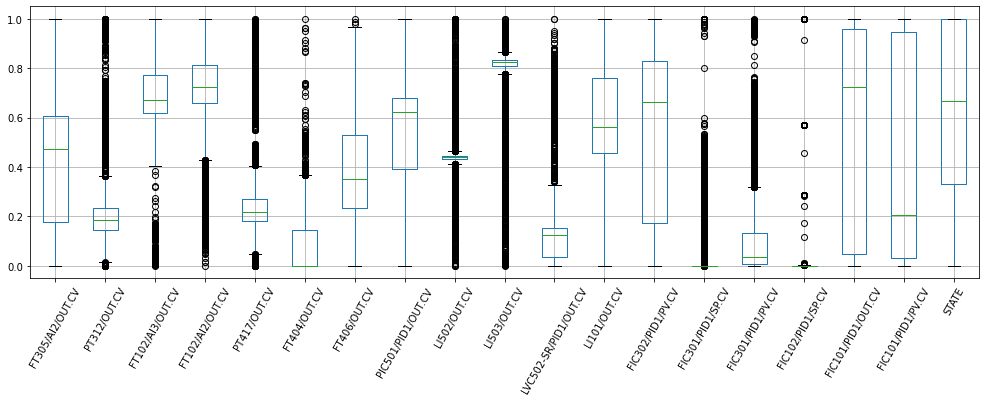

In [31]:
plt.figure(figsize=(17,5))
ax = df2.boxplot()
ax.tick_params(axis='x', rotation=60)


Realizamos un grafico de densidad para ver la distribución de cada variable del dataset

D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


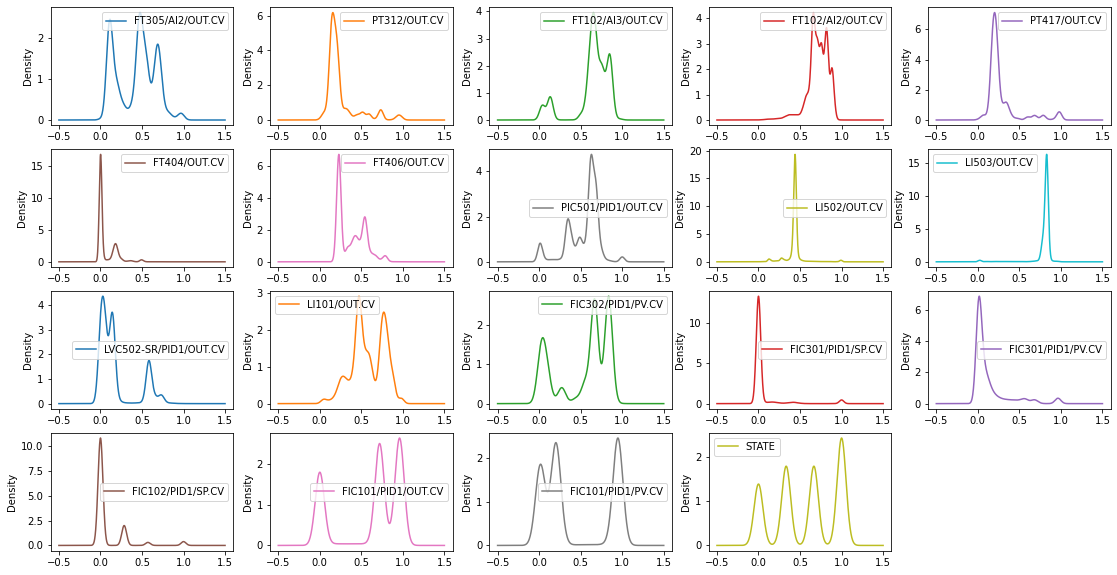

In [32]:
fig, ax = plt.subplots(figsize=(19,10))
df2.plot(ax = ax, kind='density', subplots=True, layout=(4,5), sharex=False)
#df2.plot(ax = ax, kind='hist', subplots=True, layout=(4,5), sharex=False)
plt.show()

Dividimos el dataset en train y test de forma estratificada

In [33]:
df2['STATE'] = df2['STATE'].replace([0,1/3,2/3,1],[1,2,3,4])

In [34]:
#x,y = df.iloc[:,0:-1], df["STATE"]
#train["STATE"].value_counts()
#df2 = df.set_axis(column_names, axis=1, inplace=False)

train, test = train_test_split(df2, test_size=0.2, random_state=1, stratify=df["STATE"])
train.reset_index(inplace = True, drop=True)
test.reset_index(inplace = True, drop=True)


In [35]:
#Habilitar si se desea las variables del Forward Selection
"""
train = train[['FT305/AI2/OUT.CV',
 'FT102/AI3/OUT.CV',
 'FT102/AI2/OUT.CV',
 'FIC302/PID1/PV.CV',
 'FIC301/PID1/SP.CV',
 'FIC301/PID1/PV.CV',
 'FIC102/PID1/SP.CV',
 'STATE']]

test = test[['FT305/AI2/OUT.CV',
 'FT102/AI3/OUT.CV',
 'FT102/AI2/OUT.CV',
 'FIC302/PID1/PV.CV',
 'FIC301/PID1/SP.CV',
 'FIC301/PID1/PV.CV',
 'FIC102/PID1/SP.CV',
 'STATE']]
 
 sns.pairplot(train, vars=train.columns[:-1], hue="STATE", palette=["blue", "green", "orange","red"])
 """

'\ntrain = train[[\'FT305/AI2/OUT.CV\',\n \'FT102/AI3/OUT.CV\',\n \'FT102/AI2/OUT.CV\',\n \'FIC302/PID1/PV.CV\',\n \'FIC301/PID1/SP.CV\',\n \'FIC301/PID1/PV.CV\',\n \'FIC102/PID1/SP.CV\',\n \'STATE\']]\n\ntest = test[[\'FT305/AI2/OUT.CV\',\n \'FT102/AI3/OUT.CV\',\n \'FT102/AI2/OUT.CV\',\n \'FIC302/PID1/PV.CV\',\n \'FIC301/PID1/SP.CV\',\n \'FIC301/PID1/PV.CV\',\n \'FIC102/PID1/SP.CV\',\n \'STATE\']]\n \n sns.pairplot(train, vars=train.columns[:-1], hue="STATE", palette=["blue", "green", "orange","red"])\n '

### Función para graficar matriz de confusión

In [36]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes#classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [37]:
target_names = ["Normal Conditions","Air Blockage","Air Leakage","Diverted Flow"]

In [38]:
#df2.to_csv("./Data.csv")

# PCA

In [39]:
#Habilitar en caso de querer trabajar con variables aplicadas un PCA
"""
from sklearn.decomposition import PCA
estimator = PCA (n_components = 5)
pca = estimator.fit_transform(train.drop("STATE", axis=1))
print("Variance Ratio: ", estimator.explained_variance_ratio_) 
print(sum(estimator.explained_variance_ratio_))

df_pca = pd.DataFrame(pca,columns=["CP1","CP2","CP3","CP4","CP5"])
df_final = pd.concat([df_pca,train["STATE"]],axis=1)
train = df_final

pca2 = estimator.fit_transform(test.drop("STATE", axis=1))
print("Variance Ratio: ", estimator.explained_variance_ratio_) 
print(sum(estimator.explained_variance_ratio_))
df_pca2 = pd.DataFrame(pca2,columns=["CP1","CP2","CP3","CP4","CP5"])
df_final2 = pd.concat([df_pca2,test["STATE"]],axis=1)
test = df_final2

sns.pairplot(df_final, vars=df_final.columns[:-1],hue="STATE", palette=["blue", "green", "orange","red"])
"""

'\nfrom sklearn.decomposition import PCA\nestimator = PCA (n_components = 5)\npca = estimator.fit_transform(train.drop("STATE", axis=1))\nprint("Variance Ratio: ", estimator.explained_variance_ratio_) \nprint(sum(estimator.explained_variance_ratio_))\n\ndf_pca = pd.DataFrame(pca,columns=["CP1","CP2","CP3","CP4","CP5"])\ndf_final = pd.concat([df_pca,train["STATE"]],axis=1)\ntrain = df_final\n\npca2 = estimator.fit_transform(test.drop("STATE", axis=1))\nprint("Variance Ratio: ", estimator.explained_variance_ratio_) \nprint(sum(estimator.explained_variance_ratio_))\ndf_pca2 = pd.DataFrame(pca2,columns=["CP1","CP2","CP3","CP4","CP5"])\ndf_final2 = pd.concat([df_pca2,test["STATE"]],axis=1)\ntest = df_final2\n\nsns.pairplot(df_final, vars=df_final.columns[:-1],hue="STATE", palette=["blue", "green", "orange","red"])\n'

In [40]:
train.shape

(12286, 19)

# Modelos

# KNN

Max Value uniform : 0.722448340918642 (5)
Max Value distance : 0.6579847750718377 (6)


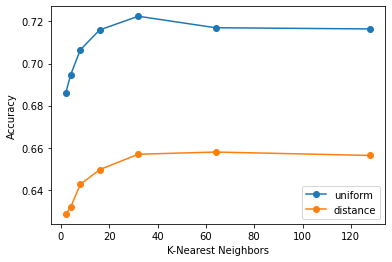

In [41]:
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

kf = KFold(n_splits = 5, shuffle = False) # shuffle = False si hay dimensión temporal 

for i, weights in enumerate(['uniform', 'distance']):
    total_scores = []
    for n_neighbors in [2,4,8,16,32,64,128]:
        fold_accuracy = []
        knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        for train_fold, test_fold in kf.split(train):
            f_train = train.loc[train_fold]
            f_test = train.loc[test_fold]
            knn.fit( X = f_train.drop(['STATE'], axis=1), y = f_train['STATE'])
            y_pred = knn.predict(X = f_test.drop(['STATE'], axis = 1))
            # Evaluación del modelo
            acc = accuracy_score(f_test['STATE'], y_pred)
            fold_accuracy.append(acc)
        total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
        
    plt.plot([2,4,8,16,32,64,128], total_scores, marker='o', label=weights)
    print ('Max Value ' +  weights + " : " +  str(max(total_scores)) +" (" + str(np.argmax(total_scores) + 1) + ")")
    plt.ylabel('Accuracy') 
    plt.xlabel('K-Nearest Neighbors')
    

plt.legend()
plt.show() 


Max Value distance : 0.7249723064206385 (14)


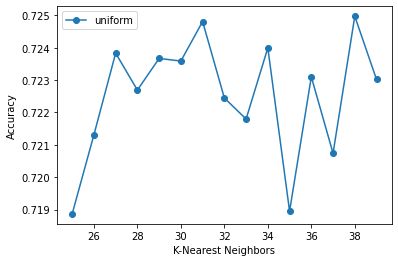

In [42]:
kf = KFold(n_splits = 5, shuffle = False) # shuffle = False si hay dimensión temporal 

total_scores = []
for n_neighbors in range(25,40):
    fold_accuracy = []
    knn = neighbors.KNeighborsClassifier(n_neighbors, weights="uniform")
    for train_fold, test_fold in kf.split(train):
        f_train = train.loc[train_fold]
        f_test = train.loc[test_fold]
        knn.fit( X = f_train.drop(['STATE'], axis=1), y = f_train['STATE'])
        y_pred = knn.predict(X = f_test.drop(['STATE'], axis = 1))
        # Evaluación del modelo
        acc = accuracy_score(f_test['STATE'], y_pred)
        fold_accuracy.append(acc)
    total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

plt.plot(range(25,40), total_scores, marker='o', label="uniform")
print ('Max Value ' +  weights + " : " +  str(max(total_scores)) +" (" + str(np.argmax(total_scores) + 1) + ")")
plt.ylabel('Accuracy') 
plt.xlabel('K-Nearest Neighbors')    
    

plt.legend()
plt.show() 

In [116]:
# constructor
n_neighbors = 38
weights = 'uniform'
knn = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors, weights = weights) 
# fit and predict
knn.fit(X = train.drop('STATE', axis=1), y = train['STATE'])
y_pred = knn.predict(X = test.drop('STATE', axis=1))
acc = accuracy_score(test['STATE'], y_pred)
print ('Acc', acc)

Acc 0.7076822916666666


In [117]:
y_true = test['STATE']
y_pred = y_pred
target_names = ["Normal Conditions","Air Blockage","Air Leakage","Diverted Flow"]
print(classification_report(y_true, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

Normal Conditions       0.99      1.00      0.99       576
     Air Blockage       0.42      0.51      0.46       744
      Air Leakage       0.37      0.28      0.32       744
    Diverted Flow       0.99      1.00      1.00      1008

         accuracy                           0.71      3072
        macro avg       0.69      0.70      0.69      3072
     weighted avg       0.70      0.71      0.70      3072



Confusion matrix, without normalization


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

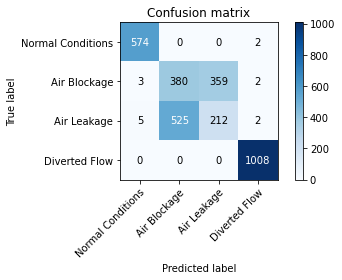

In [118]:
plot_confusion_matrix(test['STATE'], y_pred, normalize=False, 
                      classes=["Normal Conditions","Air Blockage","Air Leakage","Diverted Flow"],
                      title='Confusion matrix')

# Decision Tree

### Parametrización

Max Value gini : 0.7357151301821765 (9)
Max Value entropy : 0.7454011437738045 (8)


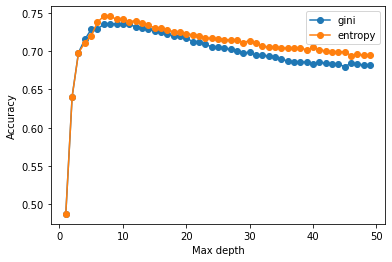

In [46]:
from sklearn.tree import DecisionTreeClassifier
kf = KFold(n_splits = 5, shuffle = False) # shuffle = False si hay dimensión temporal 

for i, criterion in enumerate(['gini', 'entropy']):
    total_scores = []
    for deep in range(1,50):
        fold_accuracy = []
        model = DecisionTreeClassifier(criterion=criterion, max_depth=deep)
        for train_fold, test_fold in kf.split(train):
            f_train = train.loc[train_fold]
            f_test = train.loc[test_fold]
            model.fit( X = f_train.drop(['STATE'], axis=1), y = f_train['STATE'])
            y_pred = model.predict(X = f_test.drop(['STATE'], axis = 1))
            # Evaluación del modelo
            acc = accuracy_score(f_test['STATE'], y_pred)
            fold_accuracy.append(acc)
        total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
        
    plt.plot(range(1,50), total_scores, marker='o', label=criterion)
    print ('Max Value ' +  criterion + " : " +  str(max(total_scores)) +" (" + str(np.argmax(total_scores) + 1) + ")")
    plt.ylabel('Accuracy')
    plt.xlabel('Max depth') 
    

plt.legend()
plt.show() 

In [47]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=7)
model.fit(train.drop('STATE', axis=1), train["STATE"])
y_pred = model.predict(test.drop('STATE', axis=1))
print(accuracy_score(test['STATE'], y_pred))
print(classification_report(test['STATE'], y_pred, target_names=target_names))

0.7513020833333334
                   precision    recall  f1-score   support

Normal Conditions       1.00      1.00      1.00       576
     Air Blockage       0.42      0.07      0.12       744
      Air Leakage       0.49      0.91      0.64       744
    Diverted Flow       1.00      1.00      1.00      1008

         accuracy                           0.75      3072
        macro avg       0.73      0.74      0.69      3072
     weighted avg       0.74      0.75      0.70      3072



Confusion matrix, without normalization


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

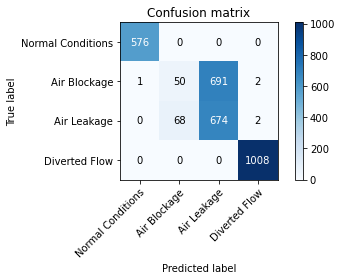

In [48]:
plot_confusion_matrix(test['STATE'], y_pred, normalize=False, 
                      classes=["Normal Conditions","Air Blockage","Air Leakage","Diverted Flow"],
                      title='Confusion matrix')  

# SVM

Parametrizacion

In [49]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grid = {'C': [0.001,0.1,1, 10], 'gamma': [0.001,0.01,0.1,1,10],'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}


In [50]:

grid = RandomizedSearchCV(SVC(), param_grid, refit=True, verbose=2, cv = 3, n_iter=50, scoring = "accuracy") #GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv = 3) #
grid.fit(train.drop("STATE", axis = 1), train["STATE"])


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END .....................C=0.001, gamma=10, kernel=poly; total time=   4.4s
[CV] END .....................C=0.001, gamma=10, kernel=poly; total time=   4.3s
[CV] END .....................C=0.001, gamma=10, kernel=poly; total time=   4.4s
[CV] END ......................C=10, gamma=10, kernel=linear; total time=   4.1s
[CV] END ......................C=10, gamma=10, kernel=linear; total time=   3.6s
[CV] END ......................C=10, gamma=10, kernel=linear; total time=   3.3s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   8.3s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   8.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   7.5s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   8.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   8.1s
[CV] END ........................C=10, gamma=0.

[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=   2.7s
[CV] END ...................C=0.001, gamma=0.01, kernel=poly; total time=   3.7s
[CV] END ...................C=0.001, gamma=0.01, kernel=poly; total time=   3.8s
[CV] END ...................C=0.001, gamma=0.01, kernel=poly; total time=   3.8s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   3.3s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   3.4s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   3.3s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   1.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.9s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   1.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.3s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.2s
[CV] END ...................

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=50,
                   param_distributions={'C': [0.001, 0.1, 1, 10],
                                        'gamma': [0.001, 0.01, 0.1, 1, 10],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   scoring='accuracy', verbose=2)

In [51]:
print(grid.best_estimator_)

SVC(C=10, gamma=10, kernel='linear')


In [52]:
model = SVC(C=10, gamma=0.001, kernel='linear')

In [53]:
grid.best_score_

0.7497966786541005

In [54]:
grid_predictions = grid.predict(test.drop("STATE", axis = 1))
y_pred = grid.predict(test.drop("STATE", axis = 1))
print(accuracy_score(test["STATE"],y_pred))

0.748046875


In [55]:
print(classification_report(test["STATE"],grid_predictions))

              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00       576
         2.0       0.49      0.70      0.58       744
         3.0       0.47      0.26      0.33       744
         4.0       1.00      1.00      1.00      1008

    accuracy                           0.75      3072
   macro avg       0.74      0.74      0.73      3072
weighted avg       0.74      0.75      0.73      3072



Confusion matrix, without normalization


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

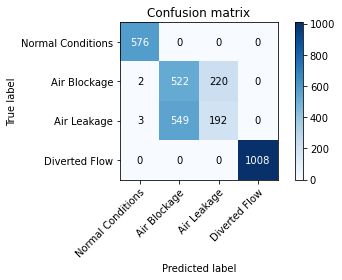

In [56]:
plot_confusion_matrix(test['STATE'], y_pred, normalize=False, 
                      classes=["Normal Conditions","Air Blockage","Air Leakage","Diverted Flow"],
                      title='Confusion matrix') 

SVM se demora mucho con alto número de muestras

In [57]:
model = SVC(C= 100, kernel='rbf', gamma=100)
model.fit(train.drop('STATE', axis=1), train["STATE"])

SVC(C=100, gamma=100)

In [58]:
y_pred = model.predict(test.drop('STATE', axis=1))
print(accuracy_score(test['STATE'], y_pred))
print(classification_report(test['STATE'], y_pred, target_names=target_names))

0.6057942708333334
                   precision    recall  f1-score   support

Normal Conditions       0.96      1.00      0.98       576
     Air Blockage       0.20      0.21      0.21       744
      Air Leakage       0.19      0.18      0.18       744
    Diverted Flow       1.00      0.99      0.99      1008

         accuracy                           0.61      3072
        macro avg       0.59      0.59      0.59      3072
     weighted avg       0.60      0.61      0.60      3072



Confusion matrix, without normalization


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

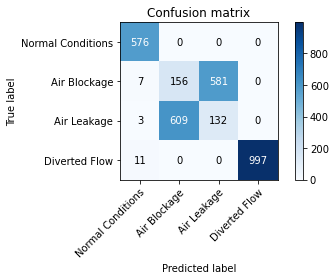

In [59]:
plot_confusion_matrix(test['STATE'], y_pred, normalize=False, 
                      classes=["Normal Conditions","Air Blockage","Air Leakage","Diverted Flow"],
                      title='Confusion matrix') 

# Random Forest

In [60]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'criterion':['gini','entropy'],
 'max_depth': [10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80],
 'min_samples_leaf': [1, 2, 4, 8, 16],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 200, 300, 400, 500]}

rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=7)
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
rf_random.fit(train.drop("STATE", axis=1),train["STATE"])


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=  11.7s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=  11.7s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=  11.8s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=16, min_samples_split=5, n_estimators=400; total time=   5.9s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=16, min_samples_split=5, n_estimators=400; total time=   5.9s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=16, min_samples_split=5, n_estimators=400; total time=   5.8s
[CV] END criterion=entropy, max_depth=80, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   2.5s
[CV] END criterion=entropy, max_depth=80, min_samples_leaf=8, min_samples_split=10, n_estimators=100; 

[CV] END criterion=gini, max_depth=45, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   8.0s
[CV] END criterion=gini, max_depth=45, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   8.0s
[CV] END criterion=gini, max_depth=45, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   7.8s
[CV] END criterion=gini, max_depth=45, min_samples_leaf=8, min_samples_split=5, n_estimators=400; total time=   6.7s
[CV] END criterion=gini, max_depth=45, min_samples_leaf=8, min_samples_split=5, n_estimators=400; total time=   6.7s
[CV] END criterion=gini, max_depth=45, min_samples_leaf=8, min_samples_split=5, n_estimators=400; total time=   6.5s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   6.9s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   7.0s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=4, min

[CV] END criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   9.0s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   9.1s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   1.6s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   1.6s
[CV] END criterion=gini, max_depth=60, min_samples_leaf=16, min_samples_split=5, n_estimators=50; total time=   0.7s
[CV] END criterion=gini, max_depth=60, min_samples_leaf=16, min_samples_split=5, n_estimators=50; total time=   0.7s
[CV] END criterion=gini, max_depth=60, min_samples_leaf=16, min_samples_split=5, n_estimators=50; total time=   0.7s
[CV] END criterion=entropy, max_depth=25, min_samples_leaf

[CV] END criterion=entropy, max_depth=70, min_samples_leaf=16, min_samples_split=2, n_estimators=400; total time=   8.4s
[CV] END criterion=entropy, max_depth=70, min_samples_leaf=16, min_samples_split=2, n_estimators=400; total time=   8.4s
[CV] END criterion=entropy, max_depth=40, min_samples_leaf=16, min_samples_split=5, n_estimators=300; total time=   6.4s
[CV] END criterion=entropy, max_depth=40, min_samples_leaf=16, min_samples_split=5, n_estimators=300; total time=   6.3s
[CV] END criterion=entropy, max_depth=40, min_samples_leaf=16, min_samples_split=5, n_estimators=300; total time=  10.6s
[CV] END criterion=gini, max_depth=80, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   1.1s
[CV] END criterion=gini, max_depth=80, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   1.1s
[CV] END criterion=gini, max_depth=80, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=40, min_s

[CV] END criterion=gini, max_depth=60, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   3.0s
[CV] END criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   5.6s
[CV] END criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   5.9s
[CV] END criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   5.9s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=16, min_samples_split=5, n_estimators=400; total time=   5.2s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=1

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, 60, 70, 80],
                                        'min_samples_leaf': [1, 2, 4, 8, 16],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500]},
                   random_state=7, verbose=2)

In [61]:
rf_random.best_params_

{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 8,
 'max_depth': 10,
 'criterion': 'gini'}

In [62]:
a = {'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 16,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}

In [63]:
model = RandomForestClassifier(**a)
model.fit(train.drop("STATE", axis=1),train["STATE"])

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=16, n_estimators=300)

In [64]:
y_pred = model.predict(test.drop('STATE', axis=1))
print(accuracy_score(test['STATE'], y_pred))
print(classification_report(test['STATE'], y_pred, target_names=target_names))

0.6302083333333334
                   precision    recall  f1-score   support

Normal Conditions       1.00      1.00      1.00       576
     Air Blockage       0.23      0.22      0.23       744
      Air Leakage       0.24      0.25      0.25       744
    Diverted Flow       1.00      1.00      1.00      1008

         accuracy                           0.63      3072
        macro avg       0.62      0.62      0.62      3072
     weighted avg       0.63      0.63      0.63      3072



Confusion matrix, without normalization


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

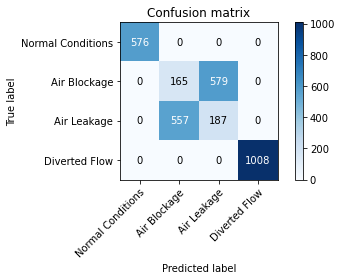

In [65]:
plot_confusion_matrix(test['STATE'], y_pred, normalize=False, 
                      classes=["Normal Conditions","Air Blockage","Air Leakage","Diverted Flow"],
                      title='Confusion matrix')

# AdaBoost

In [66]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

ada = AdaBoostClassifier()

params = {'base_estimator':[DecisionTreeClassifier(criterion='entropy', max_depth=7)],
 'n_estimators': [5, 10, 15, 20, 25, 30],
 'learning_rate': [1, 2, 3, 4]}

rf_random = GridSearchCV(estimator = ada, param_grid = params,  cv = 3, verbose=2)
rf_random.fit(train.drop("STATE", axis=1),train["STATE"])


#ada = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=7), n_estimators=20, learning_rate=2)
#model = ada.fit(train.drop("STATE", axis=1), train["STATE"])

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7), learning_rate=1, n_estimators=5; total time=   0.7s
[CV] END base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7), learning_rate=1, n_estimators=5; total time=   0.6s
[CV] END base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7), learning_rate=1, n_estimators=5; total time=   0.6s
[CV] END base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7), learning_rate=1, n_estimators=10; total time=   1.3s
[CV] END base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7), learning_rate=1, n_estimators=10; total time=   1.2s
[CV] END base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7), learning_rate=1, n_estimators=10; total time=   1.3s
[CV] END base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7), learning_rate=1, n_estimators=15; total time=   2.

[CV] END base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7), learning_rate=4, n_estimators=15; total time=   1.2s
[CV] END base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7), learning_rate=4, n_estimators=15; total time=   1.2s
[CV] END base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7), learning_rate=4, n_estimators=20; total time=   1.7s
[CV] END base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7), learning_rate=4, n_estimators=20; total time=   1.8s
[CV] END base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7), learning_rate=4, n_estimators=20; total time=   1.6s
[CV] END base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7), learning_rate=4, n_estimators=25; total time=   1.9s
[CV] END base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7), learning_rate=4, n_estimators=25; total time=   1.6s
[CV] END base_estimator=DecisionTreeClassifier(criterio

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'base_estimator': [DecisionTreeClassifier(criterion='entropy',
                                                                   max_depth=7)],
                         'learning_rate': [1, 2, 3, 4],
                         'n_estimators': [5, 10, 15, 20, 25, 30]},
             verbose=2)

In [67]:
rf_random.best_params_

{'base_estimator': DecisionTreeClassifier(criterion='entropy', max_depth=7),
 'learning_rate': 3,
 'n_estimators': 5}

In [68]:
ada = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=7), n_estimators=15, learning_rate=3)
model = ada.fit(train.drop("STATE", axis=1), train["STATE"])

In [69]:
y_pred = model.predict(test.drop('STATE', axis=1))
print(accuracy_score(test['STATE'], y_pred))
print(classification_report(test['STATE'], y_pred, target_names=target_names))

0.7434895833333334
                   precision    recall  f1-score   support

Normal Conditions       1.00      1.00      1.00       576
     Air Blockage       0.47      0.42      0.44       744
      Air Leakage       0.47      0.52      0.50       744
    Diverted Flow       1.00      1.00      1.00      1008

         accuracy                           0.74      3072
        macro avg       0.74      0.74      0.73      3072
     weighted avg       0.74      0.74      0.74      3072



Confusion matrix, without normalization


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

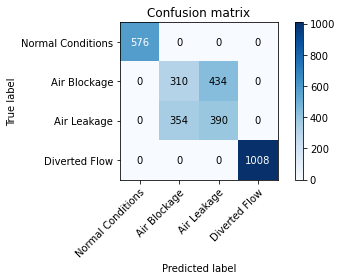

In [70]:
plot_confusion_matrix(test['STATE'], y_pred, normalize=False, 
                      classes=["Normal Conditions","Air Blockage","Air Leakage","Diverted Flow"],
                      title='Confusion matrix')

# Gradient Boost


In [71]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingClassifier()

params = {'max_depth':[2, 4, 8, 16, 32],
 'n_estimators': [10, 20, 30, 40, 50],
 'learning_rate': [1, 2, 3, 4]}

rf_random = RandomizedSearchCV(estimator = gb, param_distributions = params,  cv = 3, verbose=2, n_iter = 50)
rf_random.fit(train.drop("STATE", axis=1),train["STATE"])

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END .....learning_rate=1, max_depth=16, n_estimators=20; total time=  10.8s
[CV] END .....learning_rate=1, max_depth=16, n_estimators=20; total time=  11.7s
[CV] END .....learning_rate=1, max_depth=16, n_estimators=20; total time=  11.3s
[CV] END ......learning_rate=4, max_depth=4, n_estimators=10; total time=   1.4s
[CV] END ......learning_rate=4, max_depth=4, n_estimators=10; total time=   1.5s
[CV] END ......learning_rate=4, max_depth=4, n_estimators=10; total time=   1.6s
[CV] END ......learning_rate=4, max_depth=2, n_estimators=50; total time=   4.6s
[CV] END ......learning_rate=4, max_depth=2, n_estimators=50; total time=   4.1s
[CV] END ......learning_rate=4, max_depth=2, n_estimators=50; total time=   4.3s
[CV] END ......learning_rate=2, max_depth=2, n_estimators=20; total time=   1.6s
[CV] END ......learning_rate=2, max_depth=2, n_estimators=20; total time=   1.7s
[CV] END ......learning_rate=2, max_depth=2, n_

[CV] END .....learning_rate=2, max_depth=32, n_estimators=50; total time=   5.4s
[CV] END ......learning_rate=3, max_depth=4, n_estimators=20; total time=   3.2s
[CV] END ......learning_rate=3, max_depth=4, n_estimators=20; total time=   3.1s
[CV] END ......learning_rate=3, max_depth=4, n_estimators=20; total time=   3.2s
[CV] END .....learning_rate=2, max_depth=16, n_estimators=10; total time=   5.2s
[CV] END .....learning_rate=2, max_depth=16, n_estimators=10; total time=   5.2s
[CV] END .....learning_rate=2, max_depth=16, n_estimators=10; total time=   5.0s
[CV] END ......learning_rate=2, max_depth=4, n_estimators=40; total time=   6.7s
[CV] END ......learning_rate=2, max_depth=4, n_estimators=40; total time=   6.6s
[CV] END ......learning_rate=2, max_depth=4, n_estimators=40; total time=   6.6s
[CV] END .....learning_rate=4, max_depth=32, n_estimators=50; total time=   6.5s
[CV] END .....learning_rate=4, max_depth=32, n_estimators=50; total time=   7.9s
[CV] END .....learning_rate=

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=50,
                   param_distributions={'learning_rate': [1, 2, 3, 4],
                                        'max_depth': [2, 4, 8, 16, 32],
                                        'n_estimators': [10, 20, 30, 40, 50]},
                   verbose=2)

In [72]:
rf_random.best_params_

{'n_estimators': 10, 'max_depth': 2, 'learning_rate': 1}

In [73]:
abc = GradientBoostingClassifier(n_estimators = 40, max_depth = 2, learning_rate = 1)
model = abc.fit(train.drop("STATE", axis=1), train["STATE"])
y_pred = model.predict(test.drop("STATE", axis=1))

In [74]:
y_pred = model.predict(test.drop('STATE', axis=1))
print(accuracy_score(test['STATE'], y_pred))
print(classification_report(test['STATE'], y_pred, target_names=target_names))

0.7177734375
                   precision    recall  f1-score   support

Normal Conditions       1.00      1.00      1.00       576
     Air Blockage       0.41      0.36      0.38       744
      Air Leakage       0.43      0.48      0.45       744
    Diverted Flow       1.00      1.00      1.00      1008

         accuracy                           0.72      3072
        macro avg       0.71      0.71      0.71      3072
     weighted avg       0.72      0.72      0.72      3072



Confusion matrix, without normalization


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

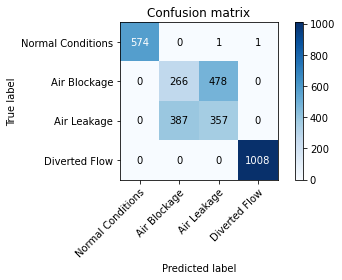

In [75]:
plot_confusion_matrix(test['STATE'], y_pred, normalize=False, 
                      classes=["Normal Conditions","Air Blockage","Air Leakage","Diverted Flow"],
                      title='Confusion matrix')

In [76]:
# Load libraries
from sklearn.ensemble import GradientBoostingClassifier


# Create adaboost classifer object
abc = GradientBoostingClassifier(n_estimators=50, learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(train.drop("STATE", axis=1), train["STATE"])

#Predict the response for test dataset
y_pred = model.predict(test.drop("STATE", axis=1))


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(test["STATE"], y_pred))

Accuracy: 0.7119140625


In [77]:
y_pred = model.predict(test.drop('STATE', axis=1))
print(accuracy_score(test['STATE'], y_pred))
print(classification_report(test['STATE'], y_pred, target_names=target_names))

0.7119140625
                   precision    recall  f1-score   support

Normal Conditions       1.00      1.00      1.00       576
     Air Blockage       0.40      0.39      0.40       744
      Air Leakage       0.41      0.42      0.42       744
    Diverted Flow       1.00      1.00      1.00      1008

         accuracy                           0.71      3072
        macro avg       0.70      0.70      0.70      3072
     weighted avg       0.71      0.71      0.71      3072



Confusion matrix, without normalization


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

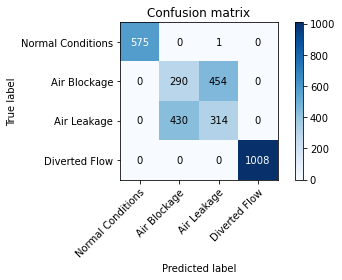

In [78]:
plot_confusion_matrix(test['STATE'], y_pred, normalize=False, 
                      classes=["Normal Conditions","Air Blockage","Air Leakage","Diverted Flow"],
                      title='Confusion matrix')

### Feature Selection

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Max Value :0.7395833333333334


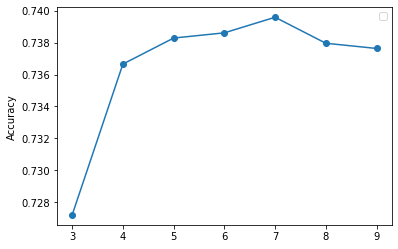

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SequentialFeatureSelector
model = DecisionTreeClassifier(criterion='entropy')#DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0) #GradientBoostingClassifier(n_estimators=50, learning_rate=1)#

total_scores = []
for i in range(3,10):
    sfs = SequentialFeatureSelector(model, n_features_to_select= i , direction="forward",  scoring='accuracy')
    sfs.fit(train.drop('STATE', axis=1), train["STATE"])
    
    #Modelo
    Xtrain = train[list(sfs.get_feature_names_out(list(train.columns)[:-1]))]
    Xtest = test[list(sfs.get_feature_names_out(list(train.columns)[:-1]))]
    model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
    model.fit(Xtrain, train["STATE"])
    y_pred = model.predict(Xtest)
    total_scores.append(accuracy_score(test['STATE'], y_pred))
  
plt.plot(range(3,10), total_scores, marker='o')
print ('Max Value :' +  str(max(total_scores)))
plt.ylabel('Accuracy')      
plt.legend()
plt.show() 


In [80]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(model, n_features_to_select= 7 , direction="forward",  scoring='accuracy')
sfs.fit(train.drop('STATE', axis=1), train["STATE"])

SequentialFeatureSelector(estimator=DecisionTreeClassifier(criterion='entropy',
                                                           max_depth=10,
                                                           random_state=0),
                          n_features_to_select=7, scoring='accuracy')

In [81]:
list(sfs.get_feature_names_out(list(train.columns)[:-1]))

['FT305/AI2/OUT.CV',
 'FT102/AI3/OUT.CV',
 'FT102/AI2/OUT.CV',
 'FIC302/PID1/PV.CV',
 'FIC301/PID1/SP.CV',
 'FIC301/PID1/PV.CV',
 'FIC102/PID1/SP.CV']

In [82]:
Xtrain = train[list(sfs.get_feature_names_out(list(train.columns)[:-1]))]
Xtest = test[list(sfs.get_feature_names_out(list(train.columns)[:-1]))]
model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
model.fit(Xtrain, train["STATE"])
y_pred = model.predict(Xtest)
print(accuracy_score(test['STATE'], y_pred))
print(classification_report(test['STATE'], y_pred, target_names=target_names))


0.7395833333333334
                   precision    recall  f1-score   support

Normal Conditions       1.00      1.00      1.00       576
     Air Blockage       0.46      0.45      0.46       744
      Air Leakage       0.47      0.47      0.47       744
    Diverted Flow       1.00      1.00      1.00      1008

         accuracy                           0.74      3072
        macro avg       0.73      0.73      0.73      3072
     weighted avg       0.74      0.74      0.74      3072



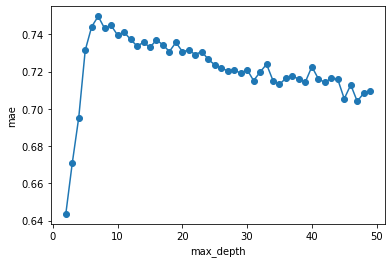

In [83]:
#Profundidad
# Compute the max 
mae = []
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
for i in range(2, 50):
    model = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    model.fit(Xtrain, train["STATE"])
    pred_values = model.predict(Xtest)
    #maev = mean_absolute_error(test["STATE"],pred_values)
    maev = accuracy_score(test['STATE'], pred_values)
    mae.append(maev)
    
# Plot mae   
plt.plot(range(2,50), mae, marker='o')
plt.xlabel('max_depth')
plt.ylabel('mae')
plt.show()

Confusion matrix, without normalization


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

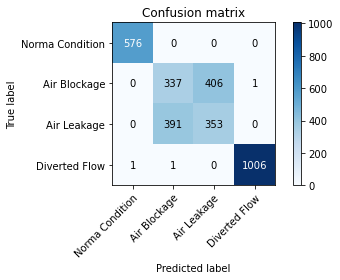

In [84]:
plot_confusion_matrix(test['STATE'], y_pred, normalize=False, 
                      classes=["Norma Condition","Air Blockage","Air Leakage","Diverted Flow"],
                      title='Confusion matrix')

# Combinar clasificadores

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

est_svc = SVC(C=10, gamma=0.001, kernel='linear', probability=True)
#score_svc=est_svc.fit(train.drop("STATE", axis=1),train["STATE"]).score(test.drop("STATE", axis=1),test["STATE"])

est_dt = DecisionTreeClassifier(criterion='entropy', max_depth=7)
#score_dt=est_dt.fit(train.drop("STATE", axis=1),train["STATE"]).score(test.drop("STATE", axis=1),test["STATE"])

est_ada = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=7), n_estimators=15, learning_rate=3)
#score_ada=est_ada.fit(train.drop("STATE", axis=1),train["STATE"]).score(test.drop("STATE", axis=1),test["STATE"])
est_rf = RandomForestClassifier(**a)

best_accuracy = []


"""
est_Ensemble = VotingClassifier(estimators=[('SVC', est_svc), ('DT', est_dt)],
                        voting='soft',
                        weights=[-4,1])

score_Ensemble=est_Ensemble.fit(train.drop("STATE", axis=1),train["STATE"])#.score(test.drop("STATE", axis=1),test["STATE"])
#score_Ensemble=est_Ensemble.fit(Xtrain,train["STATE"]) #Con forward selection
y_pred = est_Ensemble.predict(test.drop("STATE", axis=1))
#y_pred = est_Ensemble.predict(Xtest)
print(accuracy_score(test['STATE'], y_pred))
"""

'\nest_Ensemble = VotingClassifier(estimators=[(\'SVC\', est_svc), (\'DT\', est_dt)],\n                        voting=\'soft\',\n                        weights=[-4,1])\n\nscore_Ensemble=est_Ensemble.fit(train.drop("STATE", axis=1),train["STATE"])#.score(test.drop("STATE", axis=1),test["STATE"])\n#score_Ensemble=est_Ensemble.fit(Xtrain,train["STATE"]) #Con forward selection\ny_pred = est_Ensemble.predict(test.drop("STATE", axis=1))\n#y_pred = est_Ensemble.predict(Xtest)\nprint(accuracy_score(test[\'STATE\'], y_pred))\n'

In [86]:
#'estimators':[,[('SVC', est_svc), ('ADA', est_ada)],[('ADA', est_ada), ('DT', est_dt)],[('SVC', est_svc), ('DT', est_dt), ('ADA', est_ada)]],
params = {'voting': ['soft','hard'],
 'weights': [[1,1],[2,1],[1,2],[4,1],[1,4],[-2,1],[1,-2],[-4,1],[1,-4]]}

grid_ = GridSearchCV(VotingClassifier([('SVC', est_svc), ('DT', est_dt)]), param_grid = params, verbose=2, cv = 3, scoring = "accuracy")
grid_.fit(train.drop("STATE", axis=1),train["STATE"])

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ........................voting=soft, weights=[1, 1]; total time=   3.2s
[CV] END ........................voting=soft, weights=[1, 1]; total time=   3.4s
[CV] END ........................voting=soft, weights=[1, 1]; total time=   3.2s
[CV] END ........................voting=soft, weights=[2, 1]; total time=   3.3s
[CV] END ........................voting=soft, weights=[2, 1]; total time=   3.0s
[CV] END ........................voting=soft, weights=[2, 1]; total time=   3.3s
[CV] END ........................voting=soft, weights=[1, 2]; total time=   3.5s
[CV] END ........................voting=soft, weights=[1, 2]; total time=   3.0s
[CV] END ........................voting=soft, weights=[1, 2]; total time=   3.0s
[CV] END ........................voting=soft, weights=[4, 1]; total time=   3.4s
[CV] END ........................voting=soft, weights=[4, 1]; total time=   3.1s
[CV] END ........................voting=soft, we

GridSearchCV(cv=3,
             estimator=VotingClassifier(estimators=[('SVC',
                                                     SVC(C=10, gamma=0.001,
                                                         kernel='linear',
                                                         probability=True)),
                                                    ('DT',
                                                     DecisionTreeClassifier(criterion='entropy',
                                                                            max_depth=7))]),
             param_grid={'voting': ['soft', 'hard'],
                         'weights': [[1, 1], [2, 1], [1, 2], [4, 1], [1, 4],
                                     [-2, 1], [1, -2], [-4, 1], [1, -4]]},
             scoring='accuracy', verbose=2)

In [87]:
grid_.best_params_

{'voting': 'soft', 'weights': [-4, 1]}

In [88]:
est_Ensemble = VotingClassifier(estimators=[('SVC', est_svc), ('DT', est_dt)],
                        voting='soft',
                        weights=[-4,1])

score_Ensemble=est_Ensemble.fit(train.drop("STATE", axis=1),train["STATE"])
y_pred = est_Ensemble.predict(test.drop("STATE", axis=1))
print(accuracy_score(test['STATE'], y_pred))

0.7659505208333334


In [89]:
#'estimators':[,,[('ADA', est_ada), ('DT', est_dt)],[('SVC', est_svc), ('DT', est_dt), ('ADA', est_ada)]],
params = {'voting': ['soft','hard'],
 'weights': [[1,1],[2,1],[1,2],[4,1],[1,4],[-2,1],[1,-2],[-4,1],[1,-4]]}

grid_ = GridSearchCV(VotingClassifier([('SVC', est_svc), ('ADA', est_ada)]), param_grid = params, verbose=2, cv = 3, scoring = "accuracy")
grid_.fit(train.drop("STATE", axis=1),train["STATE"])

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ........................voting=soft, weights=[1, 1]; total time=   5.9s
[CV] END ........................voting=soft, weights=[1, 1]; total time=   4.6s
[CV] END ........................voting=soft, weights=[1, 1]; total time=   4.8s
[CV] END ........................voting=soft, weights=[2, 1]; total time=   4.8s
[CV] END ........................voting=soft, weights=[2, 1]; total time=   4.9s
[CV] END ........................voting=soft, weights=[2, 1]; total time=   4.7s
[CV] END ........................voting=soft, weights=[1, 2]; total time=   4.7s
[CV] END ........................voting=soft, weights=[1, 2]; total time=   4.7s
[CV] END ........................voting=soft, weights=[1, 2]; total time=   4.5s
[CV] END ........................voting=soft, weights=[4, 1]; total time=   4.8s
[CV] END ........................voting=soft, weights=[4, 1]; total time=   4.8s
[CV] END ........................voting=soft, we

GridSearchCV(cv=3,
             estimator=VotingClassifier(estimators=[('SVC',
                                                     SVC(C=10, gamma=0.001,
                                                         kernel='linear',
                                                         probability=True)),
                                                    ('ADA',
                                                     AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                                              max_depth=7),
                                                                        learning_rate=3,
                                                                        n_estimators=15))]),
             param_grid={'voting': ['soft', 'hard'],
                         'weights': [[1, 1], [2, 1], [1, 2], [4, 1], [1, 4],
                                     [-2, 1], [1, -2], [-4, 1], [1,

In [90]:
grid_.best_params_

{'voting': 'soft', 'weights': [-2, 1]}

In [113]:
est_Ensemble = VotingClassifier(estimators=[('SVC', est_svc), ('ADA', est_ada)],
                        voting='soft',
                        weights=[-2,1])

score_Ensemble=est_Ensemble.fit(train.drop("STATE", axis=1),train["STATE"])
y_pred = est_Ensemble.predict(test.drop("STATE", axis=1))
print(accuracy_score(test['STATE'], y_pred))

0.775390625


In [92]:
#'estimators':[,,,[('SVC', est_svc), ('DT', est_dt), ('ADA', est_ada)]],
params = {'voting': ['soft','hard'],
 'weights': [[1,1],[2,1],[1,2],[4,1],[1,4],[-2,1],[1,-2],[-4,1],[1,-4]]}

grid_ = GridSearchCV(VotingClassifier([('ADA', est_ada), ('DT', est_dt)]), param_grid = params, verbose=2, cv = 3, scoring = "accuracy")
grid_.fit(train.drop("STATE", axis=1),train["STATE"])

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ........................voting=soft, weights=[1, 1]; total time=   1.7s
[CV] END ........................voting=soft, weights=[1, 1]; total time=   1.6s
[CV] END ........................voting=soft, weights=[1, 1]; total time=   2.0s
[CV] END ........................voting=soft, weights=[2, 1]; total time=   1.9s
[CV] END ........................voting=soft, weights=[2, 1]; total time=   1.9s
[CV] END ........................voting=soft, weights=[2, 1]; total time=   1.7s
[CV] END ........................voting=soft, weights=[1, 2]; total time=   2.0s
[CV] END ........................voting=soft, weights=[1, 2]; total time=   1.6s
[CV] END ........................voting=soft, weights=[1, 2]; total time=   1.8s
[CV] END ........................voting=soft, weights=[4, 1]; total time=   1.8s
[CV] END ........................voting=soft, weights=[4, 1]; total time=   1.4s
[CV] END ........................voting=soft, we

GridSearchCV(cv=3,
             estimator=VotingClassifier(estimators=[('ADA',
                                                     AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                                              max_depth=7),
                                                                        learning_rate=3,
                                                                        n_estimators=15)),
                                                    ('DT',
                                                     DecisionTreeClassifier(criterion='entropy',
                                                                            max_depth=7))]),
             param_grid={'voting': ['soft', 'hard'],
                         'weights': [[1, 1], [2, 1], [1, 2], [4, 1], [1, 4],
                                     [-2, 1], [1, -2], [-4, 1], [1, -4]]},
             scoring='accuracy',

In [93]:
grid_.best_params_

{'voting': 'soft', 'weights': [1, -2]}

In [125]:
est_Ensemble = VotingClassifier(estimators=[('ADA', est_ada), ('DT', est_dt)],
                        voting='soft',
                        weights=[1, -4])

score_Ensemble=est_Ensemble.fit(train.drop("STATE", axis=1),train["STATE"])
y_pred = est_Ensemble.predict(test.drop("STATE", axis=1))
print(accuracy_score(test['STATE'], y_pred))

0.7659505208333334


In [95]:
#'estimators':[,,,],
params = {'voting': ['soft','hard'],
 'weights': [[1,1,1],[2,1,1],[1,1,2],[1,2,1],[4,-4,1],[1,1,4],[1,4,1],[-2,1,1],[1,1,-2],[1,-2,1],[-4,1,1],[1,1,-4],[1,-4,1]]}

grid_ = GridSearchCV(VotingClassifier([('SVC', est_svc), ('DT', est_dt), ('ADA', est_ada)]), param_grid = params, verbose=2, cv = 3, scoring = "accuracy")
grid_.fit(train.drop("STATE", axis=1),train["STATE"])

Fitting 3 folds for each of 26 candidates, totalling 78 fits
[CV] END .....................voting=soft, weights=[1, 1, 1]; total time=   4.8s
[CV] END .....................voting=soft, weights=[1, 1, 1]; total time=   4.8s
[CV] END .....................voting=soft, weights=[1, 1, 1]; total time=   4.5s
[CV] END .....................voting=soft, weights=[2, 1, 1]; total time=   4.7s
[CV] END .....................voting=soft, weights=[2, 1, 1]; total time=   4.9s
[CV] END .....................voting=soft, weights=[2, 1, 1]; total time=   4.8s
[CV] END .....................voting=soft, weights=[1, 1, 2]; total time=   4.8s
[CV] END .....................voting=soft, weights=[1, 1, 2]; total time=   4.8s
[CV] END .....................voting=soft, weights=[1, 1, 2]; total time=   4.6s
[CV] END .....................voting=soft, weights=[1, 2, 1]; total time=   4.8s
[CV] END .....................voting=soft, weights=[1, 2, 1]; total time=   4.8s
[CV] END .....................voting=soft, weigh

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_voting.py", line 341, in predict
    maj = np.argmax(self.predict_proba(X), axis=1)
  File "D:\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113

[CV] END ....................voting=soft, weights=[-2, 1, 1]; total time=   4.9s


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_voting.py", line 341, in predict
    maj = np.argmax(self.predict_proba(X), axis=1)
  File "D:\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113

[CV] END ....................voting=soft, weights=[-2, 1, 1]; total time=   4.7s


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_voting.py", line 341, in predict
    maj = np.argmax(self.predict_proba(X), axis=1)
  File "D:\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113

[CV] END ....................voting=soft, weights=[-2, 1, 1]; total time=   4.6s


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_voting.py", line 341, in predict
    maj = np.argmax(self.predict_proba(X), axis=1)
  File "D:\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113

[CV] END ....................voting=soft, weights=[1, 1, -2]; total time=   4.8s


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_voting.py", line 341, in predict
    maj = np.argmax(self.predict_proba(X), axis=1)
  File "D:\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113

[CV] END ....................voting=soft, weights=[1, 1, -2]; total time=   4.5s


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_voting.py", line 341, in predict
    maj = np.argmax(self.predict_proba(X), axis=1)
  File "D:\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113

[CV] END ....................voting=soft, weights=[1, 1, -2]; total time=   4.7s


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_voting.py", line 341, in predict
    maj = np.argmax(self.predict_proba(X), axis=1)
  File "D:\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113

[CV] END ....................voting=soft, weights=[1, -2, 1]; total time=   5.0s


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_voting.py", line 341, in predict
    maj = np.argmax(self.predict_proba(X), axis=1)
  File "D:\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113

[CV] END ....................voting=soft, weights=[1, -2, 1]; total time=   4.5s


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_voting.py", line 341, in predict
    maj = np.argmax(self.predict_proba(X), axis=1)
  File "D:\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113

[CV] END ....................voting=soft, weights=[1, -2, 1]; total time=   4.9s
[CV] END ....................voting=soft, weights=[-4, 1, 1]; total time=   5.0s
[CV] END ....................voting=soft, weights=[-4, 1, 1]; total time=   4.9s
[CV] END ....................voting=soft, weights=[-4, 1, 1]; total time=   6.4s
[CV] END ....................voting=soft, weights=[1, 1, -4]; total time=   5.2s
[CV] END ....................voting=soft, weights=[1, 1, -4]; total time=   4.9s
[CV] END ....................voting=soft, weights=[1, 1, -4]; total time=   5.0s
[CV] END ....................voting=soft, weights=[1, -4, 1]; total time=   4.9s
[CV] END ....................voting=soft, weights=[1, -4, 1]; total time=   5.1s
[CV] END ....................voting=soft, weights=[1, -4, 1]; total time=   4.7s
[CV] END .....................voting=hard, weights=[1, 1, 1]; total time=   4.9s
[CV] END .....................voting=hard, weights=[1, 1, 1]; total time=   5.1s
[CV] END ...................

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.74686727 0.74727324 0.74361087 0.74483145 0.74833217 0.75118058
 0.74239044        nan        nan        nan 0.77242342 0.74922642
 0.75541273 0.74597129 0.74515713 0.74458781 0.74605273 0.75069198
 0.7494711  0.74556451 0.37188708 0.3542245  0.37685139 0.36456026
 0.3500728  0.35349094]
  warnings.warn(


GridSearchCV(cv=3,
             estimator=VotingClassifier(estimators=[('SVC',
                                                     SVC(C=10, gamma=0.001,
                                                         kernel='linear',
                                                         probability=True)),
                                                    ('DT',
                                                     DecisionTreeClassifier(criterion='entropy',
                                                                            max_depth=7)),
                                                    ('ADA',
                                                     AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                                              max_depth=7),
                                                                        learning_rate=3,
                                           

In [96]:
grid_.best_params_

{'voting': 'soft', 'weights': [-4, 1, 1]}

In [97]:
est_Ensemble = VotingClassifier(estimators=[('SVC', est_svc), ('DT', est_dt), ('ADA', est_ada)],
                        voting='soft',
                        weights=[-4, 1, 1])

score_Ensemble=est_Ensemble.fit(train.drop("STATE", axis=1),train["STATE"])
y_pred = est_Ensemble.predict(test.drop("STATE", axis=1))
print(accuracy_score(test['STATE'], y_pred))

0.767578125


Confusion matrix, without normalization


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

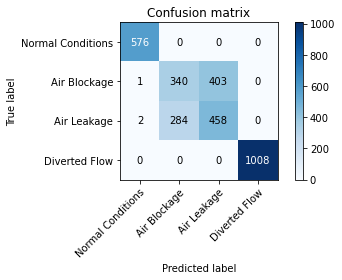

In [114]:
plot_confusion_matrix(test['STATE'], y_pred, normalize=False, 
                      classes=["Normal Conditions","Air Blockage","Air Leakage","Diverted Flow"],
                      title='Confusion matrix')

In [115]:
print(accuracy_score(test['STATE'], y_pred))
print(classification_report(test['STATE'], y_pred, target_names=target_names))

0.775390625
                   precision    recall  f1-score   support

Normal Conditions       0.99      1.00      1.00       576
     Air Blockage       0.54      0.46      0.50       744
      Air Leakage       0.53      0.62      0.57       744
    Diverted Flow       1.00      1.00      1.00      1008

         accuracy                           0.78      3072
        macro avg       0.77      0.77      0.77      3072
     weighted avg       0.78      0.78      0.77      3072



# Exportar modelo

In [100]:
import pickle
pickle.dump(est_Ensemble, open("modelo.sav", "wb"))

In [101]:
xdata = [[ 1.77124958e+01,  2.68044124e+00,  2.31452560e+01,  9.97644775e+02,
   2.01716981e+00,  9.31972217e+00,  1.27589459e+00,  2.36850998e+01,
   6.20815643e+01,  9.85630615e+01,  3.61293243e+01,  1.41074281e+00,
   9.89466995e+01, 1.00001000e+02,  2.94003361e+01,  2.00000000e+00,
   0.00000000e+00, -4.11821180e-03]]


In [102]:
 est_Ensemble.predict(xdata)

D:\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


array([3.])

In [103]:
xdata

[[17.7124958,
  2.68044124,
  23.145256,
  997.644775,
  2.01716981,
  9.31972217,
  1.27589459,
  23.6850998,
  62.0815643,
  98.5630615,
  36.1293243,
  1.41074281,
  98.9466995,
  100.001,
  29.4003361,
  2.0,
  0.0,
  -0.0041182118]]